Old Faithful ist ein Geysir im Yellowstone National Park in Wyoming:
https://en.wikipedia.org/wiki/Old_Faithful

Im Datensatz `oldfaithful.txt` sind Längen von 272 aufeinanderfolgenden Ausbrüchen aufgeführt. Hier ist ein Histogramm der Daten.

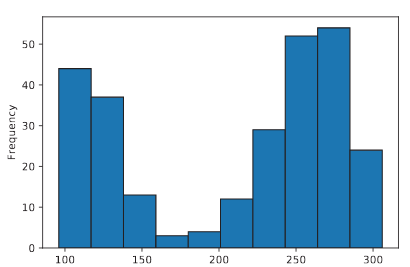

a) Schätzen Sie den Mittelwert der Eruptionsdauern ab und geben Sie ein 95% Vertrauensintervall mit dem vereinfachten Bootstrap-Verfahren im Skript an. Verwenden Sie dazu 1000 Bootstraps.

In [52]:
import numpy as np

np.random.seed(1337)

x = np.loadtxt(r"oldfaithful.txt")
n = np.size(x)

nboot = 1000 
bootstrapsample = np.reshape(
    np.random.choice(x, n*nboot, replace=True),
    (n, nboot)
)
xbarstar = np.mean(bootstrapsample, axis=0)

print('Vertrauensintervall: ', np.percentile(xbarstar, q=[2.5, 97.5]))

Vertrauensintervall:  [201.48005515 216.56865809]


b) Machen Sie dasselbe für den Median.

In [25]:
np.median(bootstrapsample)

240.0

c) Schätzen Sie die Wahrscheinlichkeit

$$P(|\bar{x} - μ| > 5)$$

ab.

Ersetzen Sie zur Abschätzung $μ$ durch den Mittelwert der Daten und $\bar{x}$ durch die Bootstraps.

In [50]:
nboot = 1000
sample = np.reshape(
    np.random.choice(x, n*nboot, replace=True),
    (n, nboot)
)
diffs = np.abs(np.mean(sample, axis=0) - np.mean(x))

left = np.sum(diffs > 5)
right = np.sum(diffs < -5)

(left + right)/nboot

0.218